In [196]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn import KNN
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_fscore_support
)
from sklearn.preprocessing import label_binarize
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

### get all class name from new-food directory

In [197]:
def listOfclasses(directory):
    class_list = []
    for C in os.listdir(directory):
            class_list.append(C)
    return class_list

dataset_path = "food-data-set"
classes = listOfclasses(dataset_path)
print(classes)

['clam_chowder', 'donuts', 'pizza', 'waffles']


In [198]:
image_size = (120, 120)

data = []
labels = []
for class_index, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name) # path for an image
        try:
            image = Image.open(image_path).resize(image_size).convert('RGB')
            image_array = np.array(image)
            data.append(image_array)
            labels.append(class_index)
        except Exception as e:
            print(f"error in loading image {image_path}: {e}")


# list of images and labels to np arrays
data = np.array(data) 
labels = np.array(labels)

### Split dataset into train and test sets

In [199]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42)

### print image array and info about arrays

In [200]:
# print(X_test)
# print(X_test[1][1])
# print(X_test[1][1][1])
# print(y_test)

print(f"the number of testing images = {X_test.shape[0]}")  # the number of testing images (first dimensional of x_test)
print(f"the number of training images = {X_train.shape[0]}")  # the number of training images (first dimensional of x_train)
print(X_train.shape[1])  # height of each image (pixels)
print(X_train.shape[2])  # width of each image (pixels) means the image size is (120*120)
print(X_train.shape[3])  # number of color per image => 3 for RGB
print(X_train.shape) # 4D
# print(X_train)

the number of testing images = 1000
the number of training images = 3000
120
120
3
(3000, 120, 120, 3)


### image test

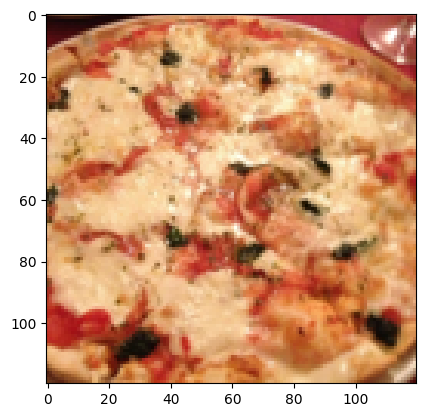

In [207]:
plt.imshow(X_train[1000])

### Flatten images => turn it to column vector

In [208]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
# print(X_train[0][0][0]) 4D
print(X_train_flat.shape) # (the number of images, (120 * 120 * 3) = 43200 ) 2D
# each image have 43200 column(info) 

(3000, 43200)


### build the logistic regression model

In [209]:
model = LogisticRegression(max_iter=1000, class_weight='balanced', multi_class='ovr')
# max_iter=1000 => If the model doesn't converge within 1000 iterations, it will stop.
# class_weight = 'balanced' => helps the model to not be biased toward the more frequent classes.
# multi_class = 'ovr' => (One-vs-Rest) is a strategy for handling multi-class classification.
model.fit(X_train_flat, y_train)

c:\ProgramData\anaconda3\envs\ML-env\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='ovr')

### Evaluate the model

In [210]:
y_pred_logistic = model.predict(X_test_flat)
y_proba_logistic = model.predict_proba(X_test_flat)  # Probabilities for ROC and AUC

# Accuracy
accuracy = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy:{accuracy:.3f}") # Accuracy= Total number of predictions / Number of correct predictions


# predict the image
image_path = Image.open('don.jpg').resize((120, 120))
img_ar = np.array(image_path).reshape(1, -1)

predicted_class = model.predict(img_ar)
print(f"Predicted Class: {classes[predicted_class[0]]}")

Accuracy:0.396
Predicted Class: donuts


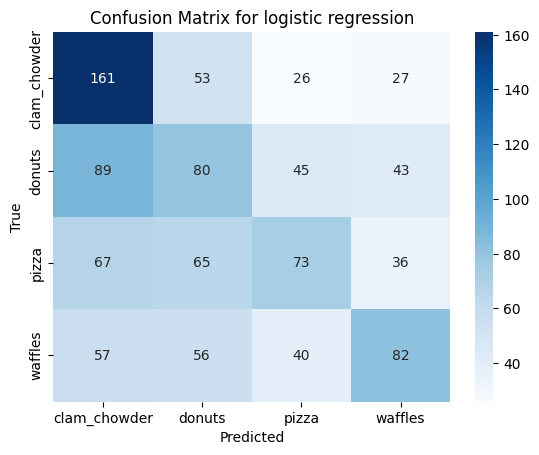

In [214]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for logistic regression')
plt.show()

# KNN Classifier

## Normalize

In [212]:
scaler = MinMaxScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

# Train the KNN model

In [213]:
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn.fit(X_train_flat, y_train)
y_pred_knn = knn.predict(X_test_flat)
y_proba_knn = model.predict_proba(X_test_flat)  # Probabilities for ROC and AUC

accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.321


## predict the image

In [215]:
image_path = Image.open('don.jpg').resize((120, 120))
img_ar = np.array(image_path).reshape(1, -1)

predicted_class = model.predict(img_ar)
print(f"Predicted Class: {classes[predicted_class[0]]}")

Predicted Class: donuts


## Confusion matrix for KNN classifier

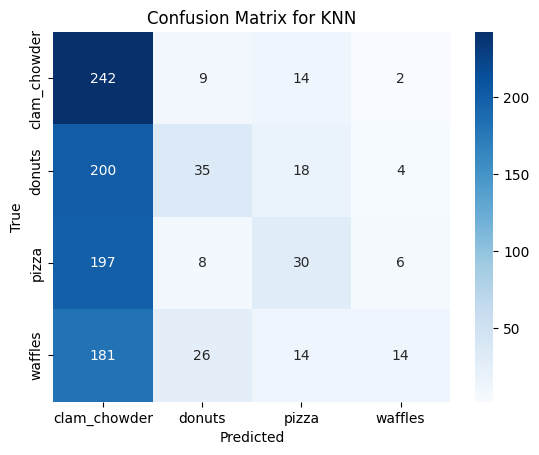

In [216]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN')
plt.show()

### Precision, Recall for logistic and KNN


In [219]:
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred_logistic, average='weighted')
print(f"Logistic regression => Precision : {precision:.3f}, Recall : {recall:.3f}")
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred_knn, average='weighted')
print(f"KNN => Precision : {precision:.3f}, Recall : {recall:.3f}")

Logistic regression => Precision : 0.394, Recall : 0.396
KNN => Precision : 0.416, Recall : 0.321


## ROC and AUC for logistic

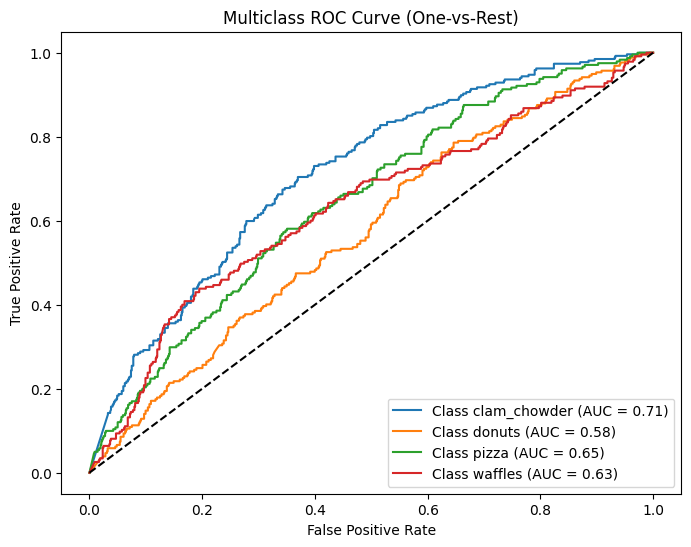

In [231]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize

n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_logistic[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve (One-vs-Rest)")
plt.legend(loc="lower right")
plt.show()

## ROC and AUC for KNN

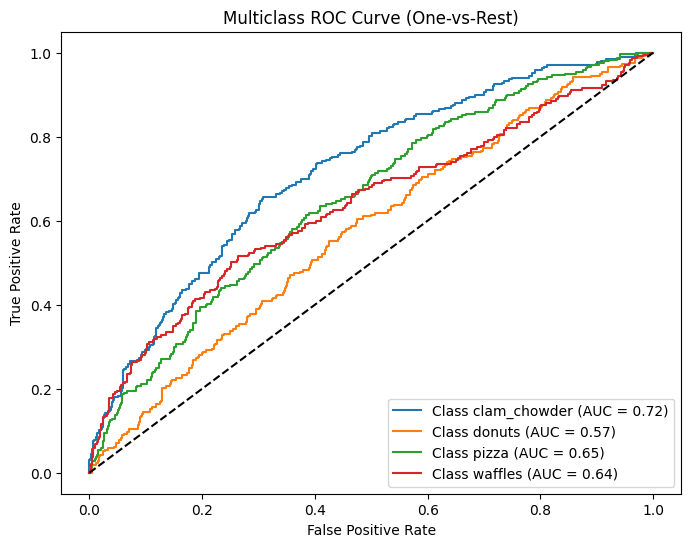

In [230]:
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

plt.figure(figsize=(8, 6))

# Plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_knn[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")


plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve (One-vs-Rest)")
plt.legend(loc="lower right")
plt.show()